In [2]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from numpy.linalg import svd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt


### Previewing the DataSet
The data set is in the form 

word dim1 dim2..... dimN

In [3]:
with open("/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

the -0.071549 0.093459 0.023738 -0.090339 0.056123 0.32547 -0.39796 -0.092139 0.061181 -0.1895 0.13061 0.14349 0.011479 0.38158 0.5403 -0.14088 0.24315 0.23036 -0.55339 0.048154 0.45662 3.2338 0.020199 0.049019 -0.014132 0.076017 -0.11527 0.2006 -0.077657 0.24328 0.16368 -0.34118 -0.06607 0.10152 0.038232 -0.17668 -0.88153 -0.33895 -0.035481 -0.55095 -0.016899 -0.43982 0.039004 0.40447 -0.2588 0.64594 0.26641 0.28009 -0.024625 0.63302 -0.317 0.10271 0.30886 0.097792 -0.38227 0.086552 0.047075 0.23511 -0.32127 -0.28538 0.1667 -0.0049707 -0.62714 -0.24904 0.29713 0.14379 -0.12325 -0.058178 -0.001029 -0.082126 0.36935 -0.00058442 0.34286 0.28426 -0.068599 0.65747 -0.029087 0.16184 0.073672 -0.30343 0.095733 -0.5286 -0.22898 0.064079 0.015218 0.34921 -0.4396 -0.43983 0.77515 -0.87767 -0.087504 0.39598 0.62362 -0.26211 -0.30539 -0.022964 0.30567 0.06766 0.15383 -0.11211 -0.09154 0.082562 0.16897 -0.032952 -0.28775 -0.2232 -0.090426 1.2407 -0.18244 -0.0075219 -0.041388 -0.011083 0.078186 0.3

### `dataLoader()` Function Explanation

The `dataLoader` function reads word embeddings from a text file (like GloVe or Word2Vec format) and returns a dictionary containing vectors for selected words.

#### **Function Signature**
```python
def dataLoader(filepath, selected_words=None)


In [4]:
def dataLoader(filepath, selected_words= None):
    embeddings= {}
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            parts= line.strip().split()
            word= parts[0]
            if selected_words is None or word in selected_words:
                vec=np.array(parts[1:])
                embeddings[word]= vec
    return embeddings


### Sample Words

In [5]:
words_list = ["king", "queen", "prince", "princess", "man", "woman", "boy", "girl", "child", "adult",
    "doctor", "nurse", "scientist", "artist", "painter", "writer", "journalist", "teacher", "student", "leader", "sir",
    "cat", "dog", "tiger", "lion", "wolf", "fox", "horse", "eagle", "dragon", "rat",
    "apple", "orange", "china", "japan", "rice", "india", "spice", "tea", "coffee", "mango",
    "robot", "machine", "mind", "brain", "human", "soul", "heart", "logic", "emotion", "feeling",
    "battle", "fight", "anger", "hate", "love", "peace", "freedom", "war", "rebel", "hero",
    "computer", "network", "web", "server", "code", "program", "keyboard", "screen", "data", "cloud",
    "music", "song", "voice", "guitar", "note", "rhythm", "tempo", "piano", "art", "poem",
    "capital", "city", "empire", "kingdom", "village", "country", "nation", "state", "republic", "government",
    "mother", "father", "family", "home", "house", "room", "life", "birth", "death", "memory",
    "friend", "enemy", "rival", "partner", "team", "group", "community", "society", "culture", "tradition",
    "book", "page", "word", "sentence", "letter", "text", "story", "fiction", "novel", "truth",
    "job", "work", "office", "company", "boss", "client", "deal", "market", "money", "profit",
    "fear", "cry", "smile", "laugh", "shout", "silence", "dream", "hope", "wish", "goal",
    "sun", "moon", "light", "dark", "night", "day", "sky", "earth", "fire", "water",
"india", "chine", "turkey", "japan", "chickens", "red", "green", "blue", "yellow"]

print(f"Length of Sample words is: {len(words_list)}")
embeddings = dataLoader("/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt", words_list)

Length of Sample words is: 160


### Word Embedding Visualization with PCA + t-SNE

This section of the notebook performs dimensionality reduction and visualization of word embeddings using **PCA** and **t-SNE**.

---

#### Step 1: Stack Word Embeddings into a Matrix

```python
X = np.stack([embeddings[word] for word in words_list])
print(X.shape)
````

#### Step 2: Define a Dimensionality Reduction Function

#### Step 3: Define a Visualization Function

In [6]:
X= np.stack([embeddings[word] for word in words_list])
print(X.shape)

def nldr(X,perp):
    X_pca = PCA(n_components=50).fit_transform(X)
    X_tsne= TSNE(n_components=2, perplexity=perp,random_state=42).fit_transform(X_pca)
    return X_tsne

def plotGraph(words_list, X_tsne, perp):
    plt.figure(figsize=(12, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color='skyblue', s=100, edgecolor='k')

    for i, word in enumerate(words_list):
        plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=9, xytext=(3, 3),textcoords='offset points')

    plt.title(f"t-SNE Visualization of Word Embeddings, Perplexity: {perp}")
    plt.tight_layout()
    plt.show()


(160, 200)


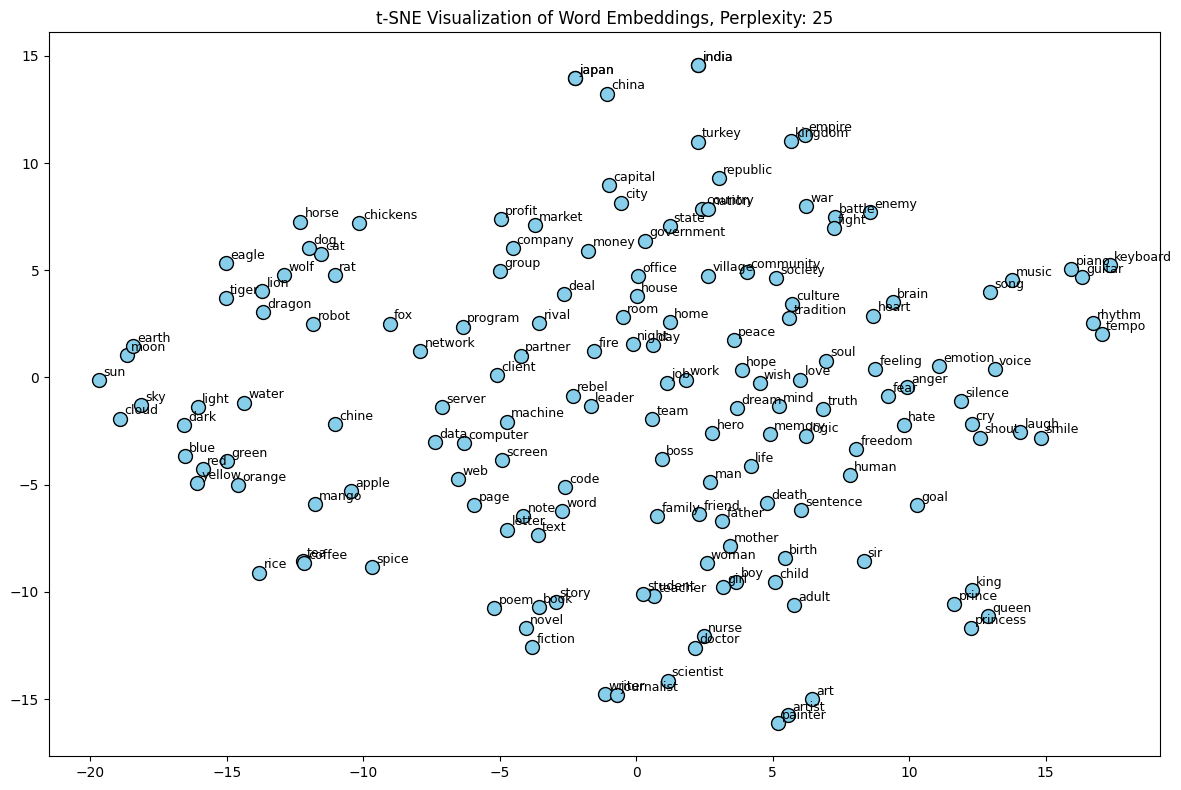

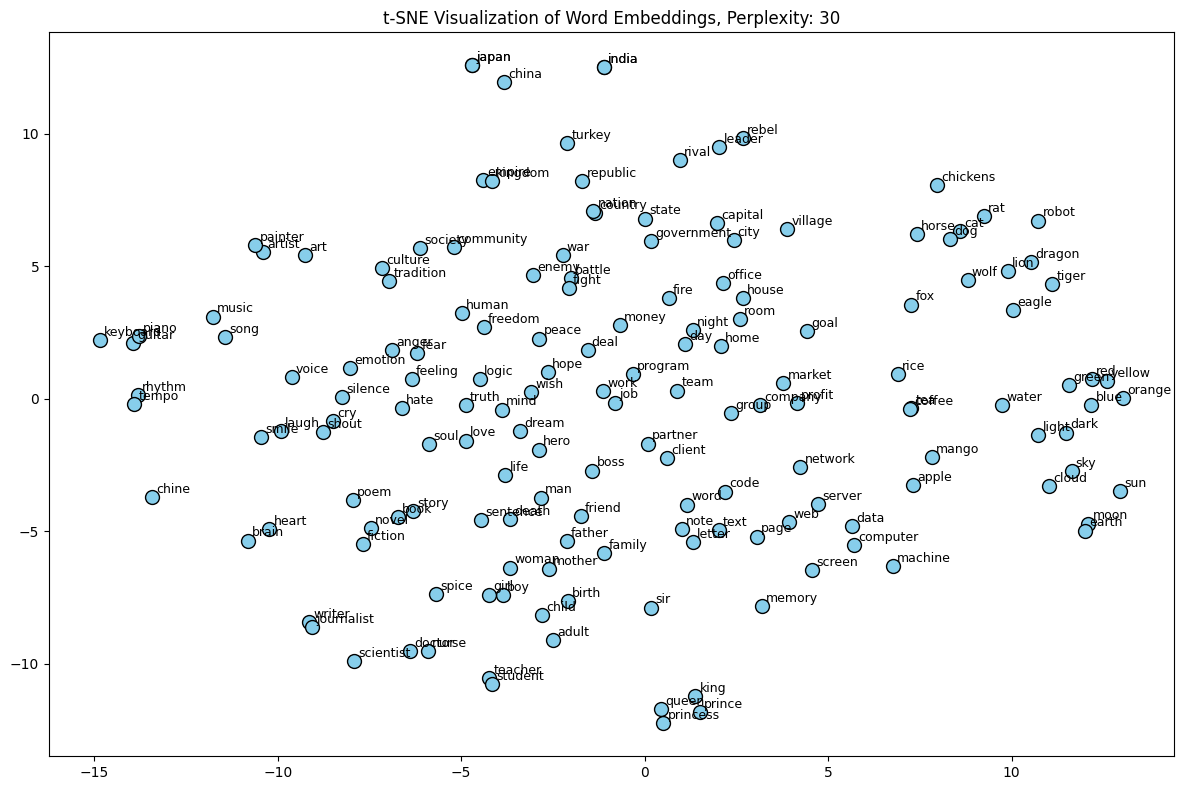

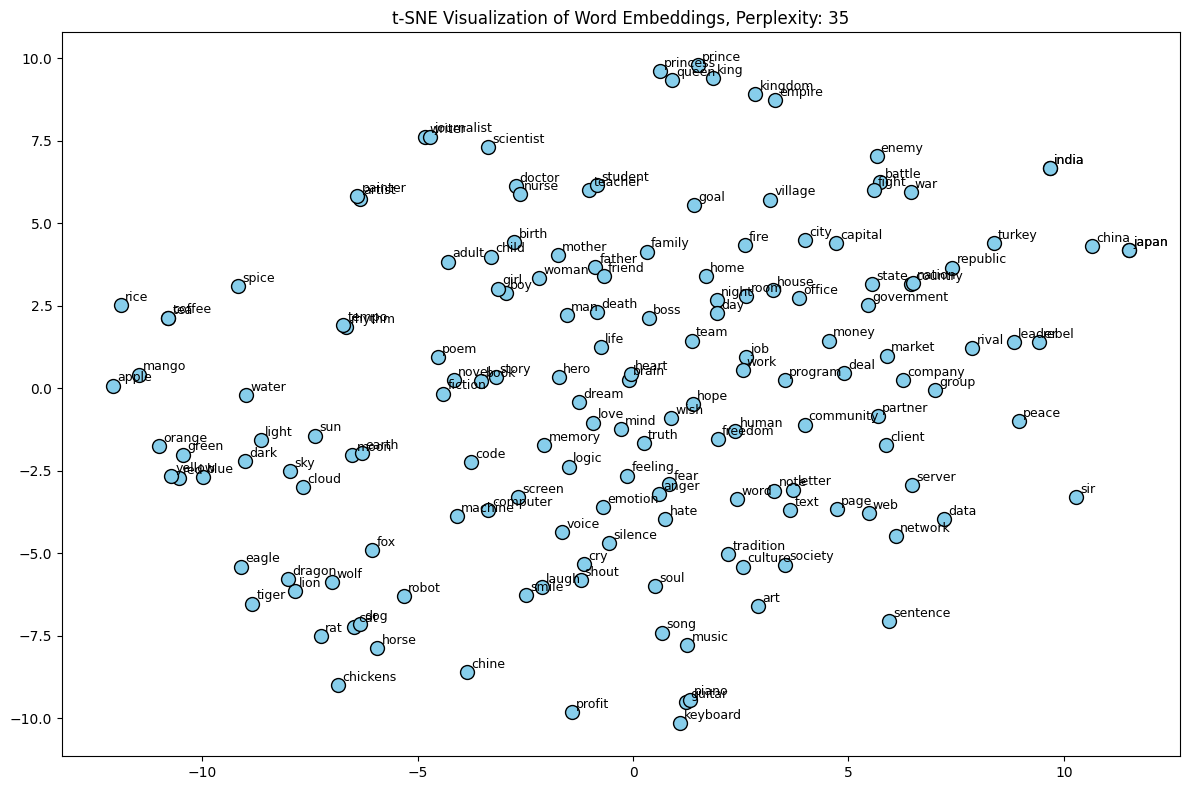

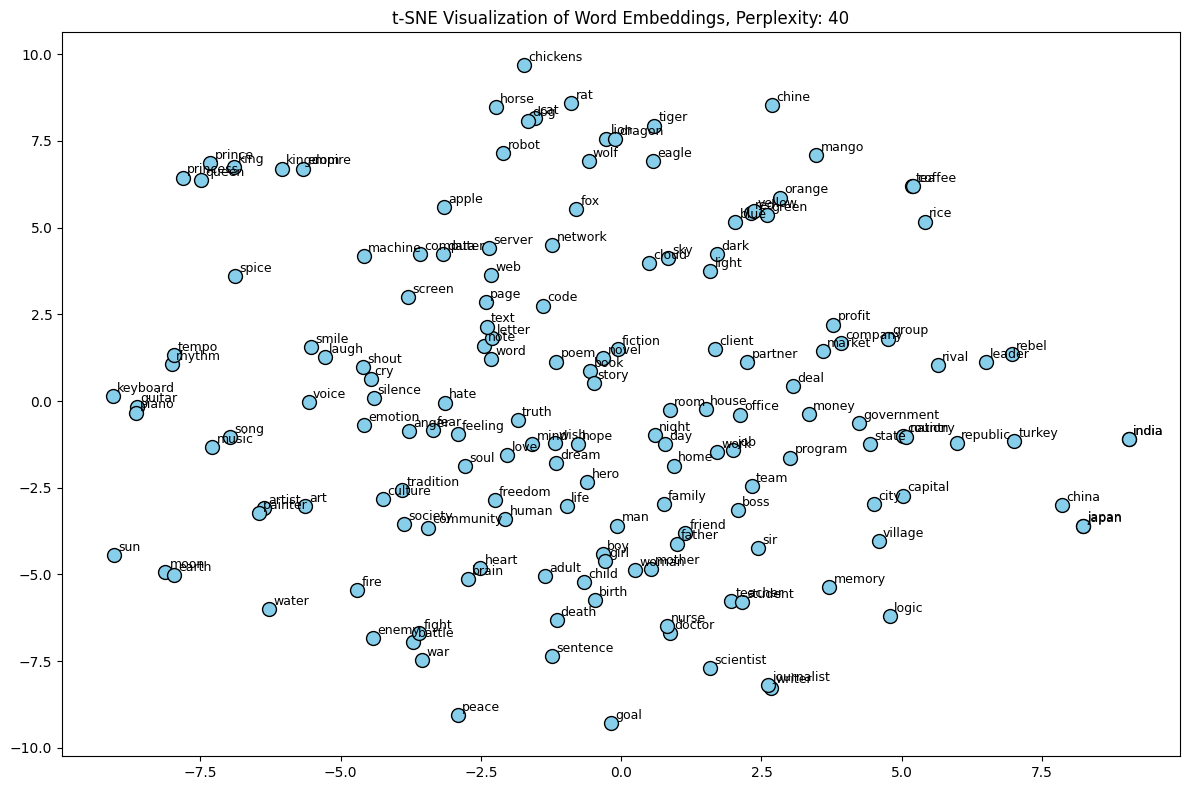

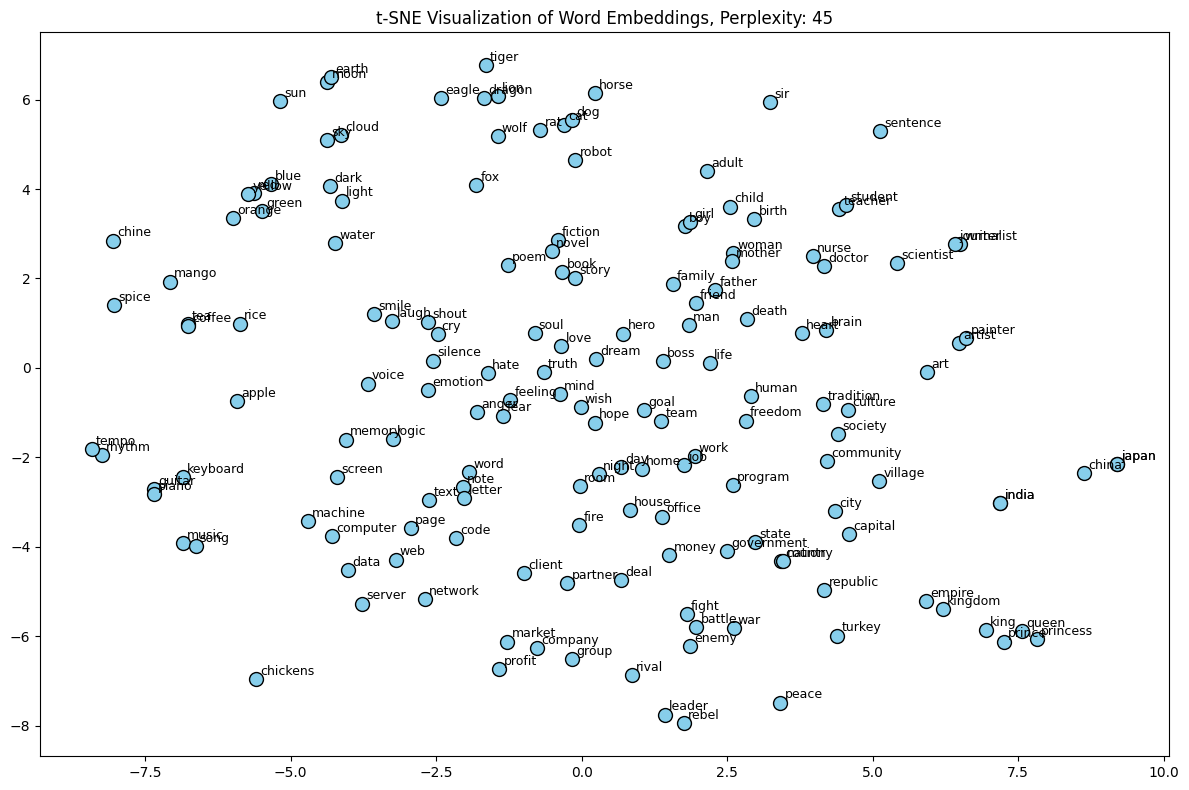

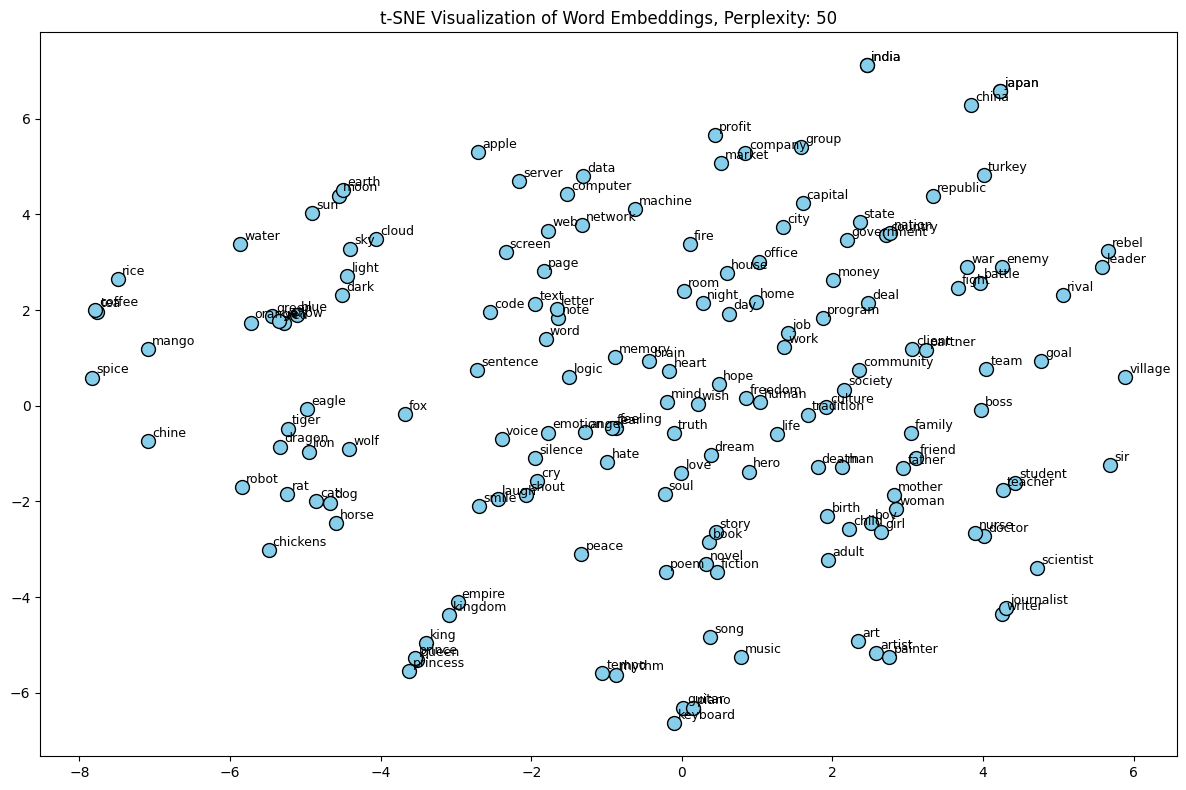

In [7]:
perp = [25,30,35,40,45,50]
for ii in perp:
    X_tsne = nldr(X, ii)
    plotGraph(words_list, X_tsne, ii)
    

Perplexity value of 30 or 25 Works, while the algorithm performs poorly on perplexity values above 40